# FDR power curve using results from new simulated data

In [1]:
import pandas as pd, numpy as np
import os
from collections import Counter
cwd = os.path.expanduser("/home/min/GIT/cnv-gene-mapping/output")
name = "simu_dele_30_0529"
prefix = f"deletion.X.colnames_b30.{name}.y"

In [2]:
m1 = "varbvs"
m2 = "susie"
m3 = "mcmc"
m4 = "sier"
m5 = "hybrid"

**Gene names in varbvs, susie and sier are different from those of mcmc, because R (varbvs, susie, sier) change gene names**

In [3]:
varbvs = pd.read_csv(f"{cwd}/{name}/{prefix}.{m1}_pip.gz", sep = "\t", header = None, usecols = [1], names = [f"pip_{m1}"])
susie = pd.read_csv(f"{cwd}/{name}/{prefix}.{m2}_pip.gz", sep = "\t", header = None, usecols = [1], names = [f"pip_{m2}"])
mcmc = pd.read_csv(f"{cwd}/{name}/{prefix}.{m3}_pip.gz", sep = "\t", header = None, names = ["gene", f"pip_{m3}"])
sier = pd.read_csv(f"{cwd}/{name}/{prefix}.{m4}_pip.gz", sep = "\t", header = None, usecols = [1], names = [f"pip_{m4}"])
hybrid = pd.read_csv(f"{cwd}/{name}/{prefix}.{m5}_pip.gz", sep = "\t", header = None, usecols = [1], names = [f"pip_{m5}"])

In [4]:
fisher = pd.read_csv(f"{cwd}/{name}/{prefix[0:-2]}.X.cleaned.fisher.gz", sep = "\t", header = 0)

In [5]:
beta_all = np.loadtxt(f"{cwd}/{name}/{prefix[0:-2]}.beta")

In [6]:
index = pd.read_csv(f"{cwd}/{name}/{prefix[0:-2]}.X.block_index_original.csv", sep = "\t", header = None, names = ["start", "end"])

In [7]:
betas = list()
for i, item in index.iterrows():
    betas.extend(list(beta_all[item[0]:(item[1]+1)]))

In [8]:
pips = pd.concat([mcmc, varbvs, susie, sier, hybrid], axis = 1).merge(fisher[["gene", "p"]], on = "gene")

In [9]:
pips["beta"] = betas

In [10]:
pips.head()

,gene,pip_mcmc,pip_varbvs,pip_susie,pip_sier,pip_hybrid,p,beta
0,TTLL10,0.00155,0.060581,0.0,0.01229,0.01229,0.580972,0.0
1,TNFRSF18,0.00155,0.060579,0.0,0.01229,0.01229,0.580972,0.0
2,TNFRSF4,0.00155,0.060577,0.0,0.01229,0.01229,0.580972,0.0
3,SDF4,0.00155,0.060574,0.0,0.01229,0.01229,0.580972,0.0
4,B3GALT6,0.00155,0.060572,0.0,0.01229,0.01229,0.580972,0.0


In [11]:
# pips["p"] = [1-i for i in pips["p"]]

In [11]:
pips["is_signal"] = pips["beta"].apply(lambda x: 1 if x != 0 else 0)

In [22]:
cutoffs = [0.025*i for i in range(0,41)]

In [23]:
n1 = len(betas)
n2 = sum(pips["is_signal"])

In [24]:
res = pd.DataFrame({"cutoff": cutoffs})

In [53]:
for x in [f"pip_{m1}", f"pip_{m2}", f"pip_{m3}", f"pip_{m4}", f"pip_{m5}", "p"]:
    res[f"{x}_FDR"] = [sum(pips[x]>=i)/n1 for i in cutoffs]
    res[f"{x}_power"] = [pips[(pips[x]>=i) & (pips["is_signal"] == 1)].shape[0]/n2 for i in cutoffs]

In [54]:
res.head()

,cutoff,pip_varbvs_FDR,pip_varbvs_power,pip_susie_FDR,pip_susie_power,pip_mcmc_FDR,pip_mcmc_power,pip_sier_FDR,pip_sier_power,pip_hybrid_FDR,pip_hybrid_power,p_FDR,p_power
0,0.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.025,0.781205,0.757576,0.208273,0.681818,0.284107,0.818182,0.353048,0.772727,0.384253,0.871212,0.666546,0.212121
2,0.050,0.549347,0.643939,0.157112,0.606061,0.169811,0.689394,0.171263,0.621212,0.193396,0.704545,0.639695,0.189394
3,0.075,0.388607,0.530303,0.099057,0.507576,0.110668,0.560606,0.100145,0.530303,0.111393,0.575758,0.626996,0.189394
4,0.100,0.267417,0.439394,0.071843,0.446970,0.079463,0.492424,0.068940,0.484848,0.083091,0.537879,0.605951,0.159091


In [55]:
res.tail()

,cutoff,pip_varbvs_FDR,pip_varbvs_power,pip_susie_FDR,pip_susie_power,pip_mcmc_FDR,pip_mcmc_power,pip_sier_FDR,pip_sier_power,pip_hybrid_FDR,pip_hybrid_power,p_FDR,p_power
36,0.900,0.022859,0.181818,0.004717,0.075758,0.006894,0.121212,0.007257,0.128788,0.007983,0.143939,0.180334,0.030303
37,0.925,0.022859,0.181818,0.004354,0.068182,0.006894,0.121212,0.006531,0.113636,0.007257,0.128788,0.178520,0.030303
38,0.950,0.021771,0.166667,0.004354,0.068182,0.006894,0.121212,0.006168,0.106061,0.007257,0.128788,0.178157,0.030303
39,0.975,0.021045,0.166667,0.003628,0.053030,0.005443,0.098485,0.005806,0.098485,0.006894,0.121212,0.178157,0.030303
40,1.000,0.006894,0.053030,0.000363,0.000000,0.001451,0.022727,0.000000,0.000000,0.001089,0.015152,0.178157,0.030303


In [56]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_prop = font_manager.FontProperties(size=24)

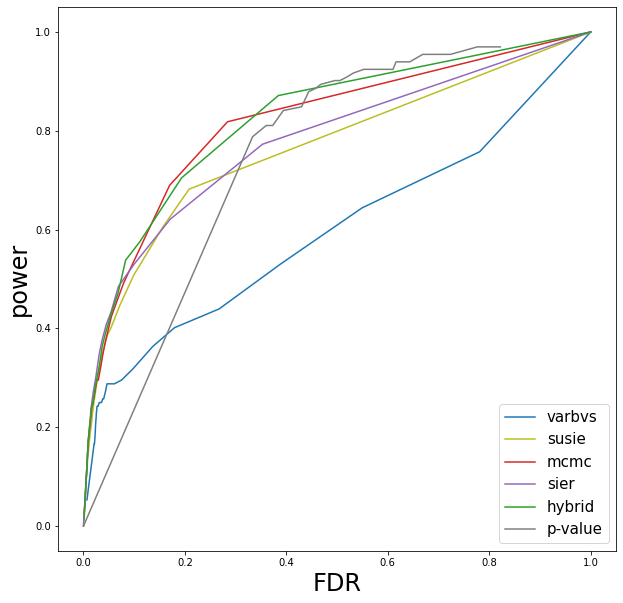

In [57]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.plot(res[f"pip_{m1}_FDR"], res[f"pip_{m1}_power"], c = "C0", label = m1)
plt.plot(res[f"pip_{m2}_FDR"], res[f"pip_{m2}_power"], c = "C8", label = m2)
plt.plot(res[f"pip_{m3}_FDR"], res[f"pip_{m3}_power"], c = "C3", label = m3)
plt.plot(res[f"pip_{m4}_FDR"], res[f"pip_{m4}_power"], c = "C4", label = m4)
plt.plot(res[f"pip_{m5}_FDR"], res[f"pip_{m5}_power"], c = "C2", label = m5)
plt.plot(1-res["p_FDR"], 1-res["p_power"], c = "C7", label = "p-value")
plt.legend(loc = 'lower right', fontsize = 15)
plt.xlabel("FDR", fontproperties=font_prop)
plt.ylabel("power", fontproperties=font_prop)
plt.show()

In [81]:
calib = pips[[f"pip_{m1}", f"pip_{m2}", f"pip_{m3}", f"pip_{m4}", "is_signal"]]